## <center> Sentiment Analysis of Critical Events using Bayesian Network </center>
####   <center> Probabilistic Graphical modals </center>
* By
P Aditya Krishna Rohit
CB.EN.P2CEN20002

#### Abstract
Sentiment analysis through machine learning using Twitter data has become a popular topic in recent years. Here we address the problem of sentiment analysis during critical events such as natural disasters or social movements. We consider Bayesian network classifiers to perform sentiment analysis on two datasets in Spanish: the 2010 Chilean earthquake and the 2017 Catalan independence referendum. In order to automatically control the number of edges that are supported by the training examples in the Bayesian network classifier, we adopt a Bayes factor approach for this purpose, yielding more realistic networks. The results show the effectiveness of using the Bayes factor measure as well as its competitive predictive results when compared to support vector machines and random forests, given a sufficient number of training examples. Also, the resulting networks allow to identify the relations amongst words, offering interesting qualitative information to historically and socially comprehend the main features of the event dynamics

#### Existing Work
* In this paper, they took 2 different datasets and compared the results for 3 different models

    *Naïve Bayes
    
    *TAN (Tree Augmented Naïve Bayes)
    
    *BF TAN (Bayesian factor Naïve Bayes)

* And we can see the accuracy scores for each.
* Among these, BF TAN got the more accuracy
* And I’m not considering TAN and BF TAN models for my work

Import Required Libraries and Load the dataset

In [1]:
from utils import process_tweet, build_freqs

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
path = 'Dataset/'
dataset = pd.read_csv(path+'tweets.csv')

In [5]:
labels = dataset.target

In [6]:
dataset.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [7]:
dataset.tail()

,id,keyword,location,text,target
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


In [8]:
dataset.shape

(11370, 5)

#### Proposed Work
* Here I want to take the tweets of critical events from all over the world which are only in English language.

*And since the dataset changes, the accuracies may change with respect to the previous work.

Then Compare two models

    Naïve Bayes classifier
    
    Multinomial Naïve Bayes classifier

In [13]:
import nltk

In [9]:
print('Number of Positive tweets: ',sum(dataset.target == 0))
print('Number of Negative tweets: ',sum(dataset.target == 1))

Number of Positive tweets:  9256
Number of Negative tweets:  2114


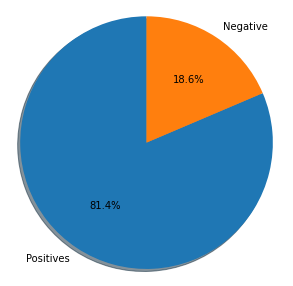

In [10]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [sum(dataset.target == 0), sum(dataset.target == 1)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [11]:
labels = dataset.target

### Data 
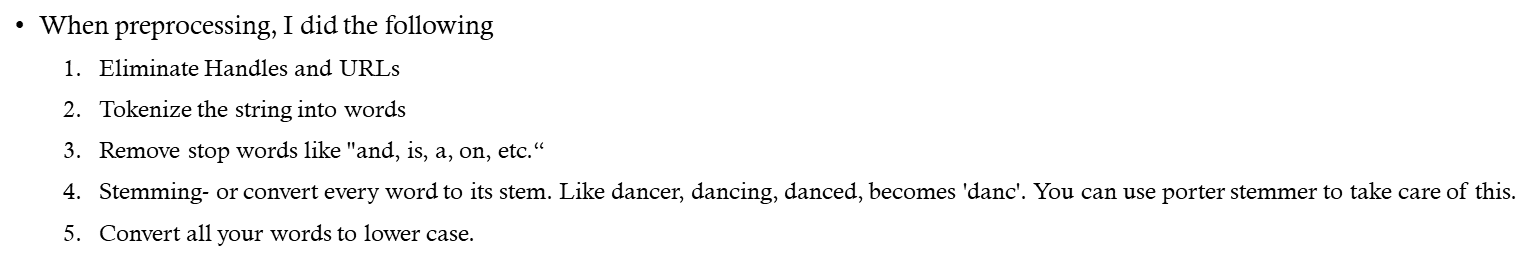

In [14]:
# download the stopwords from NLTK
nltk.download('stopwords')

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenize the string
#### To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The tokenize module from NLTK allows us to do these easily:

In [15]:
tweet1 = dataset.text[10]
print('\033[92m' + tweet1)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet1)

print()
print('Tokenized string:')
print(tweet_tokens)

Images showing the havoc caused by the #Cameroon military as they torched houses in #Oku.The shameless military is reported…


Tokenized string:
['images', 'showing', 'the', 'havoc', 'caused', 'by', 'the', '#cameroon', 'military', 'as', 'they', 'torched', 'houses', 'in', '#oku', '.', 'the', 'shameless', 'military', 'is', 'reported', '…']


## Remove stop words and punctuations
#### The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [16]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

## Extract Features
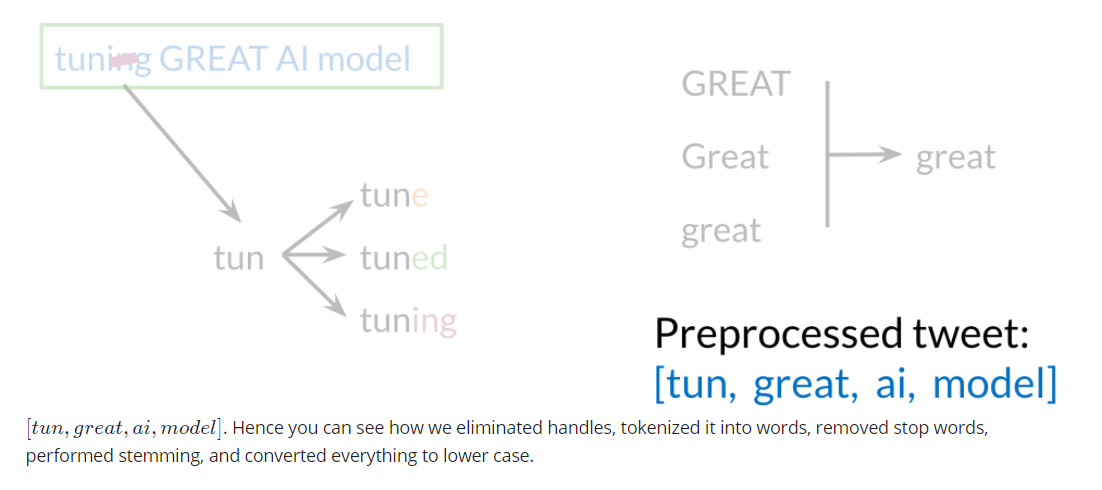

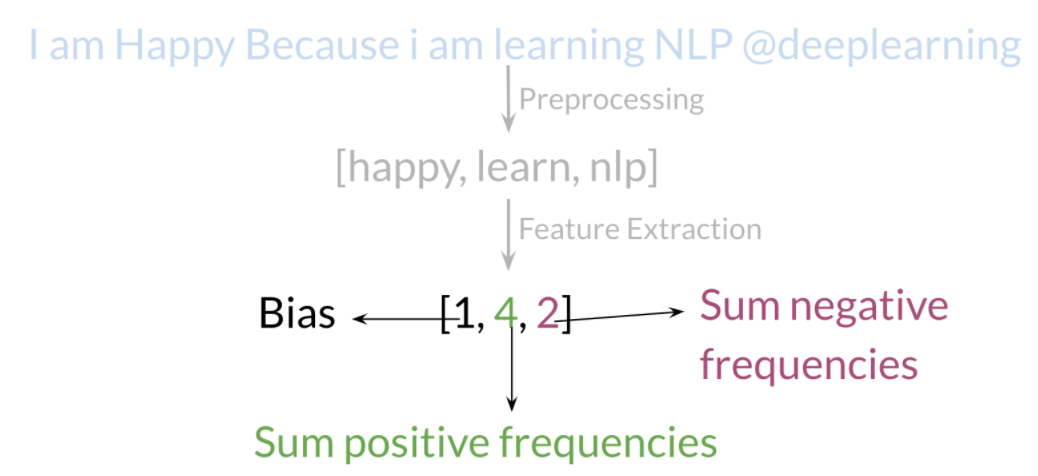

In [17]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        if((word, 1) not in freqs):
            x[0,1] += 0
        else:
            x[0,1] += freqs[(word, 1)]
        
        # increment the word count for the negative label 0
        if((word, 0) not in freqs):
            x[0,2] += 0
        else:
            x[0,2] += freqs[(word, 0)]
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [18]:
tweets = dataset.text

#### Now let's do the train-test-split with 20% of the data for testing

In [42]:
X_train, X_test, y_train, y_test = tweets[:9000], tweets[9000:], labels[:9000], labels[9000:]
np.array(X_train).shape, np.array(X_test).shape

((9000,), (2370,))

In [75]:
from keras.utils import to_categorical
ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)

In [61]:
# create frequency dictionary
freqs = build_freqs(X_train, y_train)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 18516


In [21]:
# test the function below
print('This is an example of a positive tweet: \n', X_train[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(X_train[0]))

This is an example of a positive tweet: 
 Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims' houses and some houses and vehicles were set ablaze…

This is an example of the processed version of the tweet: 
 ['commun', 'violenc', 'bhainsa', 'telangana', 'stone', 'pelt', 'muslim', 'hous', 'hous', 'vehicl', 'set', 'ablaz', '…']


In [22]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(X_train), 3))
for i in range(len(X_train)):
    X[i, :]= extract_features(X_train[i], freqs)

In [23]:
# collect the features 'x' and stack them into a matrix 'X'
Xt = np.zeros((len(X_test), 3))
for i in range(9000, len(X_test)+9000-1):
    Xt[i-9000, :]= extract_features(X_test[i], freqs)

## Naive Bayes model
#### What is a Bayesian Network


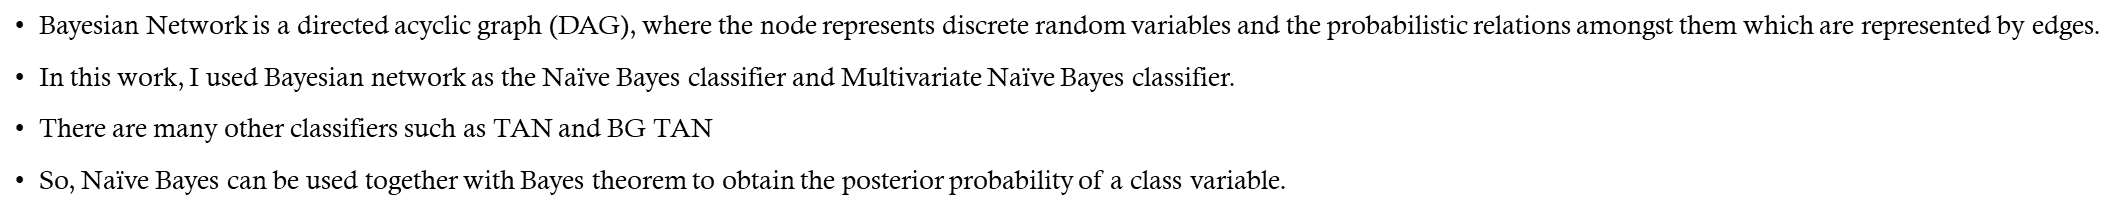

In [24]:
from sklearn.naive`_bayes import GaussianNB


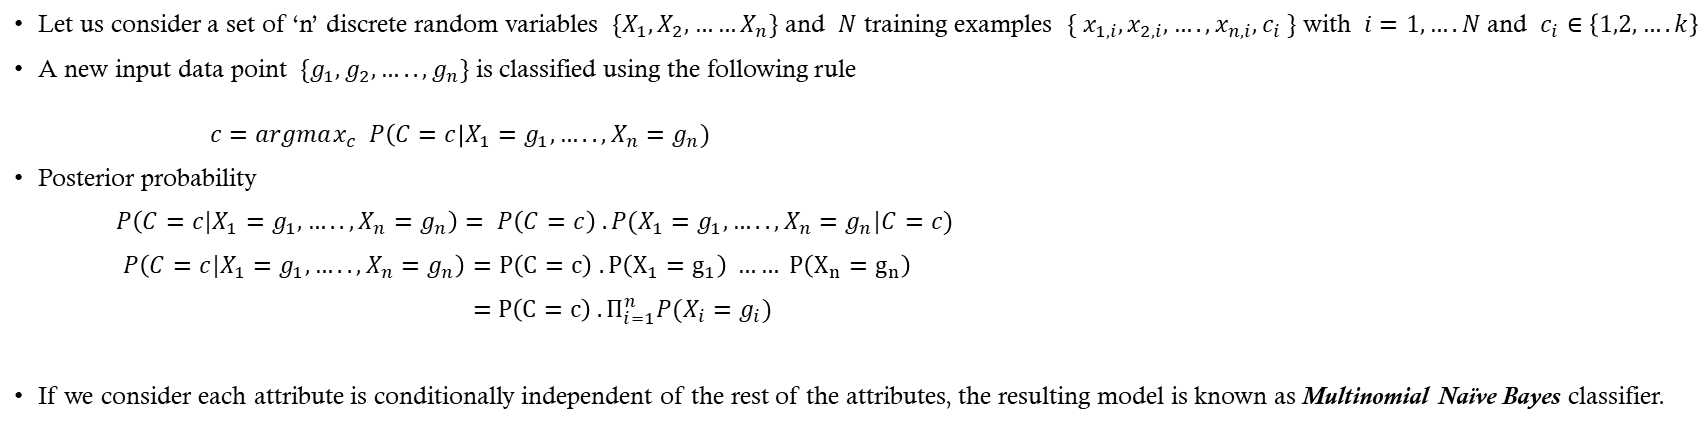

In [89]:
# Create the Multinomial Naives Bayes object
gnb = GaussianNB()
# Fit X_train and y_train to train the model
gnb.fit(X,y_train)

GaussianNB()

### Let us see, what are the possible outcomes

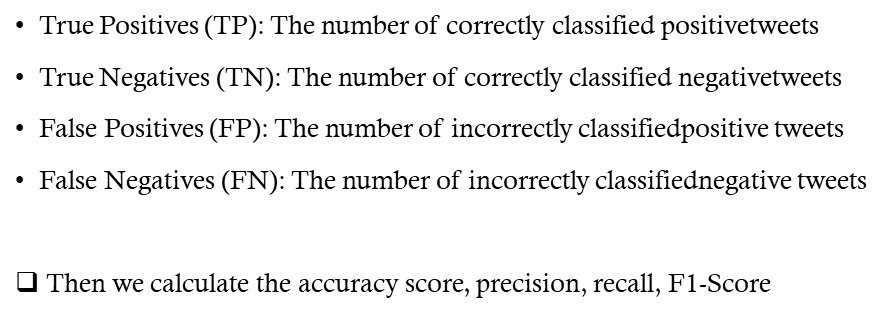

In [90]:
#Predict one
print('predicted:', gnb.predict(Xt)[0])
print('expected:', y_test.iloc[0])

predicted: 0
expected: 0


In [91]:
# Apply the model to predict X_test values
predictions1 = gnb.predict(Xt)

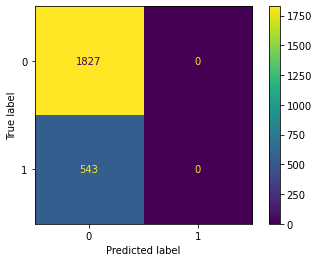

In [92]:
# Print confusion matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score
print (plot_confusion_matrix(gnb,Xt, y_test))

In [77]:
accuracy_score(y_test, predictions1)

0.7708860759493671

In [79]:
# Print classification report
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1827
           1       0.00      0.00      0.00       543

    accuracy                           0.77      2370
   macro avg       0.39      0.50      0.44      2370
weighted avg       0.59      0.77      0.67      2370



C:\Users\hp\anaconda3\envs\Rohit\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\envs\Rohit\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\envs\Rohit\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# We also do with Multinomial naive bayes theorm

In [69]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
mnb = MultinomialNB()
# Fit X_train and y_train to train the model
mnb.fit(X,y_train)

MultinomialNB()

In [73]:
# Apply the model to predict X_test values
predictions2 = mnb.predict(Xt)

In [81]:
accuracy_score(y_test, predictions2)

0.8063291139240506

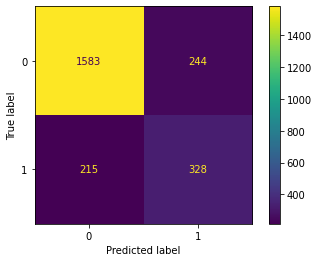

In [88]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print (plot_confusion_matrix(mnb, Xt, y_test))

In [93]:
print (classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1827
           1       0.57      0.60      0.59       543

    accuracy                           0.81      2370
   macro avg       0.73      0.74      0.73      2370
weighted avg       0.81      0.81      0.81      2370



### References
* <a href="url">https://www.sciencedirect.com/science/article/abs/pii/S0167739X19303322</a> -
Sentiment analysis of Twitter data during critical events through Bayesian networks classifiers – ScienceDirect


* <a href="url">https://www.geeksforgeeks.org/naive-bayes-classifiers/</a> - 
Naive Bayes Classifiers – GeeksforGeeks


* <a href="url">https://www.mygreatlearning.com/blog/multinomial-naive-bayes-explained/</a> - 
Multinomial Naive Bayes Classifier Algorithm (mygreatlearning.com)


### Dataset
https://www.kaggle.com/vstepanenko/disaster-tweets